In [9]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from datetime import datetime
from scipy.stats import linregress
# Files to Load
file1_to_load = "Resources/us_states.csv"
file2_to_load = "Resources/Anxiety_data.csv"

# Read CSV Files and store into Pandas data frames
covid_data = pd.read_csv(file1_to_load)
anxiety_data = pd.read_csv(file2_to_load)

#Display DataFrames for Covid and Anxiety data
display('Covid Data:', covid_data.head())
display('Anxiety Data:',anxiety_data.head())


'Covid Data:'

,date,state,fips,cases,deaths
0,1/21/2020,Washington,53,1,0
1,1/22/2020,Washington,53,1,0
2,1/23/2020,Washington,53,1,0
3,1/24/2020,Illinois,17,1,0
4,1/24/2020,Washington,53,1,0


'Anxiety Data:'

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,1,Apr 23 - May 5,4/23/2020 0:00,5/5/2020 0:00,23.2,21.5,25.0,21.5 - 25.0,NaN


In [10]:
#Clean Covid data
del covid_data['fips']
covid_data

,date,state,cases,deaths
0,1/21/2020,Washington,1,0
1,1/22/2020,Washington,1,0
2,1/23/2020,Washington,1,0
3,1/24/2020,Illinois,1,0
4,1/24/2020,Washington,1,0
...,...,...,...,...
23054,4/25/2021,Virginia,654210,10691
23055,4/25/2021,Washington,397006,5478
23056,4/25/2021,West Virginia,151382,2821
23057,4/25/2021,Wisconsin,656668,7473


In [11]:
#Clean Anxiety Data
del anxiety_data['Group']
del anxiety_data['Subgroup']
del anxiety_data['Phase']
del anxiety_data['Time Period']
del anxiety_data['Time Period Label']
del anxiety_data['Time Period End Date']
del anxiety_data['Low CI']
del anxiety_data['High CI']
del anxiety_data['Confidence Interval']
del anxiety_data['Quartile Range']

#change the date format of anxiety_data to match covid_data's
anxiety_data['Time Period Start Date'] = anxiety_data['Time Period Start Date'].apply(lambda dateStr:dateStr.split()[0])

#change column names to assist merge and be meaningful
anxiety_data_renamed = anxiety_data.rename(columns={'State':'state',"Indicator":"mental disorder","Value":"frequency of mental disorder","Time Period Start Date":"date"})
anxiety_data_renamed

,mental disorder,state,date,frequency of mental disorder
0,Symptoms of Depressive Disorder,United States,4/23/2020,23.5
1,Symptoms of Depressive Disorder,United States,4/23/2020,32.7
2,Symptoms of Depressive Disorder,United States,4/23/2020,25.7
3,Symptoms of Depressive Disorder,United States,4/23/2020,24.8
4,Symptoms of Depressive Disorder,United States,4/23/2020,23.2
...,...,...,...,...
5779,Symptoms of Anxiety Disorder or Depressive Dis...,Virginia,3/17/2021,31.4
5780,Symptoms of Anxiety Disorder or Depressive Dis...,Washington,3/17/2021,35.6
5781,Symptoms of Anxiety Disorder or Depressive Dis...,West Virginia,3/17/2021,41.0
5782,Symptoms of Anxiety Disorder or Depressive Dis...,Wisconsin,3/17/2021,32.3


In [12]:
#merge data based on states
merged_data = covid_data.merge(anxiety_data_renamed,how="inner", on = ["state","date"])
#create csv data of merged
merged_data.to_csv("Resources/merged_data.csv")
#display merged data
display(merged_data)


,date,state,cases,deaths,mental disorder,frequency of mental disorder
0,4/23/2020,Alabama,5832,197,Symptoms of Depressive Disorder,18.6
1,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder,25.6
2,4/23/2020,Alabama,5832,197,Symptoms of Anxiety Disorder or Depressive Dis...,30.3
3,4/23/2020,Alaska,335,7,Symptoms of Depressive Disorder,19.2
4,4/23/2020,Alaska,335,7,Symptoms of Anxiety Disorder,27.7
...,...,...,...,...,...,...
4126,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder,25.9
4127,3/17/2021,Wisconsin,627266,7203,Symptoms of Anxiety Disorder or Depressive Dis...,32.3
4128,3/17/2021,Wyoming,55449,693,Symptoms of Depressive Disorder,24.2
4129,3/17/2021,Wyoming,55449,693,Symptoms of Anxiety Disorder,30.1


,date,state,cases,deaths,mental disorder,frequency of mental disorder
30,4/23/2020,Georgia,20905,871,Symptoms of Depressive Disorder,25.6
31,4/23/2020,Georgia,20905,871,Symptoms of Anxiety Disorder,31.9
32,4/23/2020,Georgia,20905,871,Symptoms of Anxiety Disorder or Depressive Dis...,36.2
183,5/7/2020,Georgia,30524,1332,Symptoms of Depressive Disorder,25.6
184,5/7/2020,Georgia,30524,1332,Symptoms of Anxiety Disorder,29.5
...,...,...,...,...,...,...
3856,3/3/2021,Georgia,989698,17079,Symptoms of Anxiety Disorder,27.1
3857,3/3/2021,Georgia,989698,17079,Symptoms of Anxiety Disorder or Depressive Dis...,33.2
4008,3/17/2021,Georgia,1013340,17801,Symptoms of Depressive Disorder,25.1
4009,3/17/2021,Georgia,1013340,17801,Symptoms of Anxiety Disorder,34.0


,cases,deaths,frequency of mental disorder
date,,,
4/23/2020,20905,871,31.233333
5/7/2020,30524,1332,29.800000
5/14/2020,34422,1521,28.666667
5/21/2020,38969,1749,32.600000
5/28/2020,43363,1942,30.366667
6/4/2020,47528,2116,31.333333
6/11/2020,52332,2337,32.033333
6/18/2020,58040,2565,32.266667
6/25/2020,67796,2704,36.366667


<IPython.core.display.Javascript object>


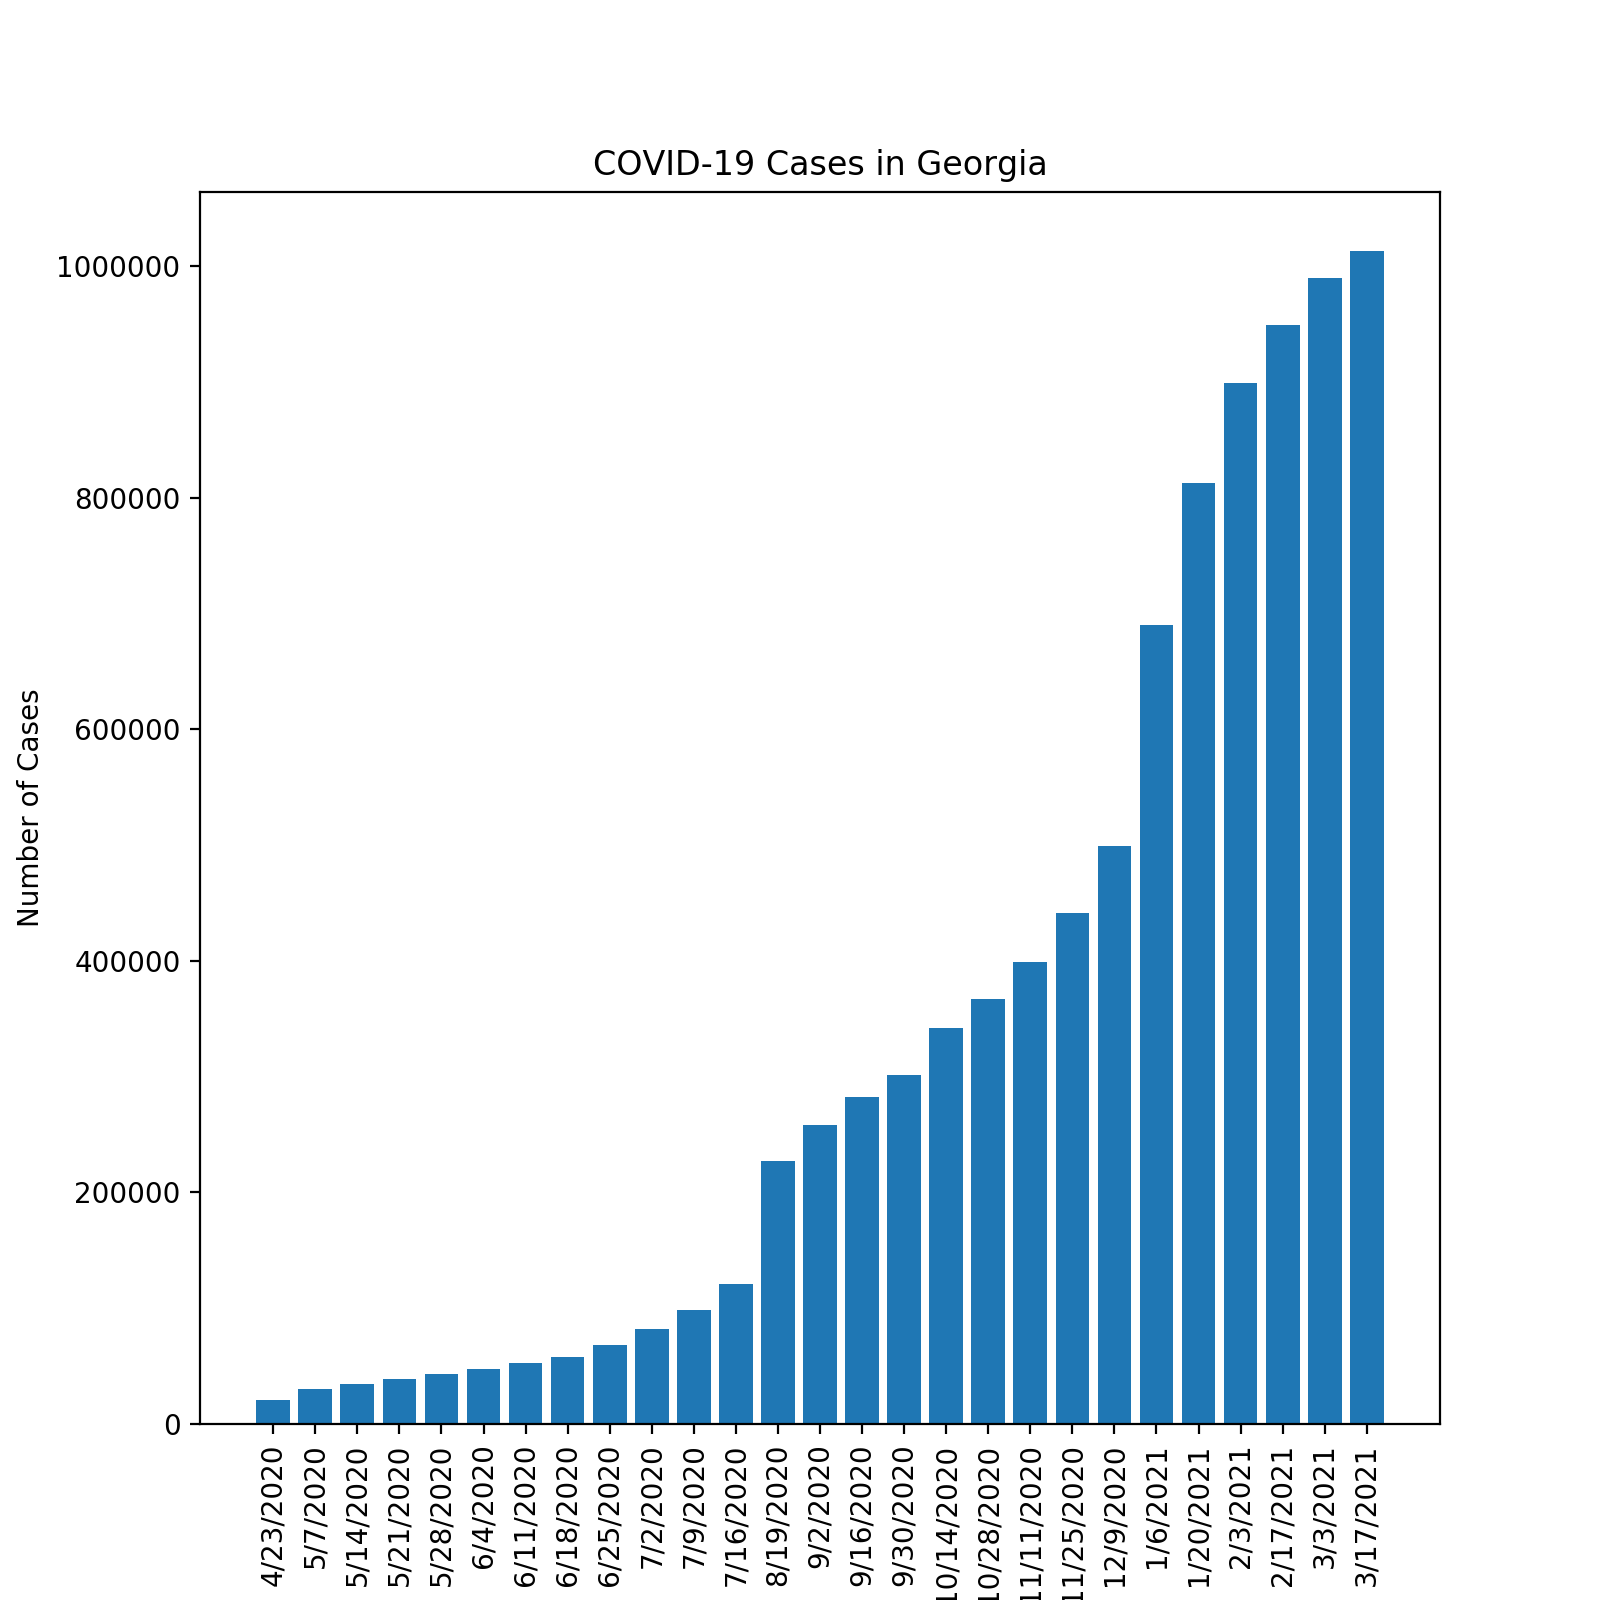

In [13]:
# Data Analysis 

#Question: How has Georgia been impacted?
#get georgia data
georgia_data=merged_data.loc[merged_data["state"]=="Georgia"]
#display georgia data
display(georgia_data)
#group georgia data by date
georgia_data_group_by_date=georgia_data.groupby(["date"],sort=False)
#get the mean
georgia_data_group_by_date_mean=georgia_data_group_by_date.mean()
#display mean data
display(georgia_data_group_by_date_mean)
#get the date array
date=georgia_data["date"].unique().tolist()
#assign data
a=date
b=georgia_data_group_by_date_mean["cases"]
c=georgia_data_group_by_date_mean["deaths"]
d=georgia_data_group_by_date_mean["frequency of mental disorder"]
#set the figure size
plt.figure(figsize=(8,8))
#plot the bar figure of COVID-19 cases in Georgia
plt.bar(a,b)
plt.xticks(rotation=90)
#set the title
plt.title("COVID-19 Cases in Georgia")
#set the y label
plt.ylabel("Number of Cases")
#save the png image
plt.savefig("Images/COVID-19 Cases in Georgia")

<IPython.core.display.Javascript object>


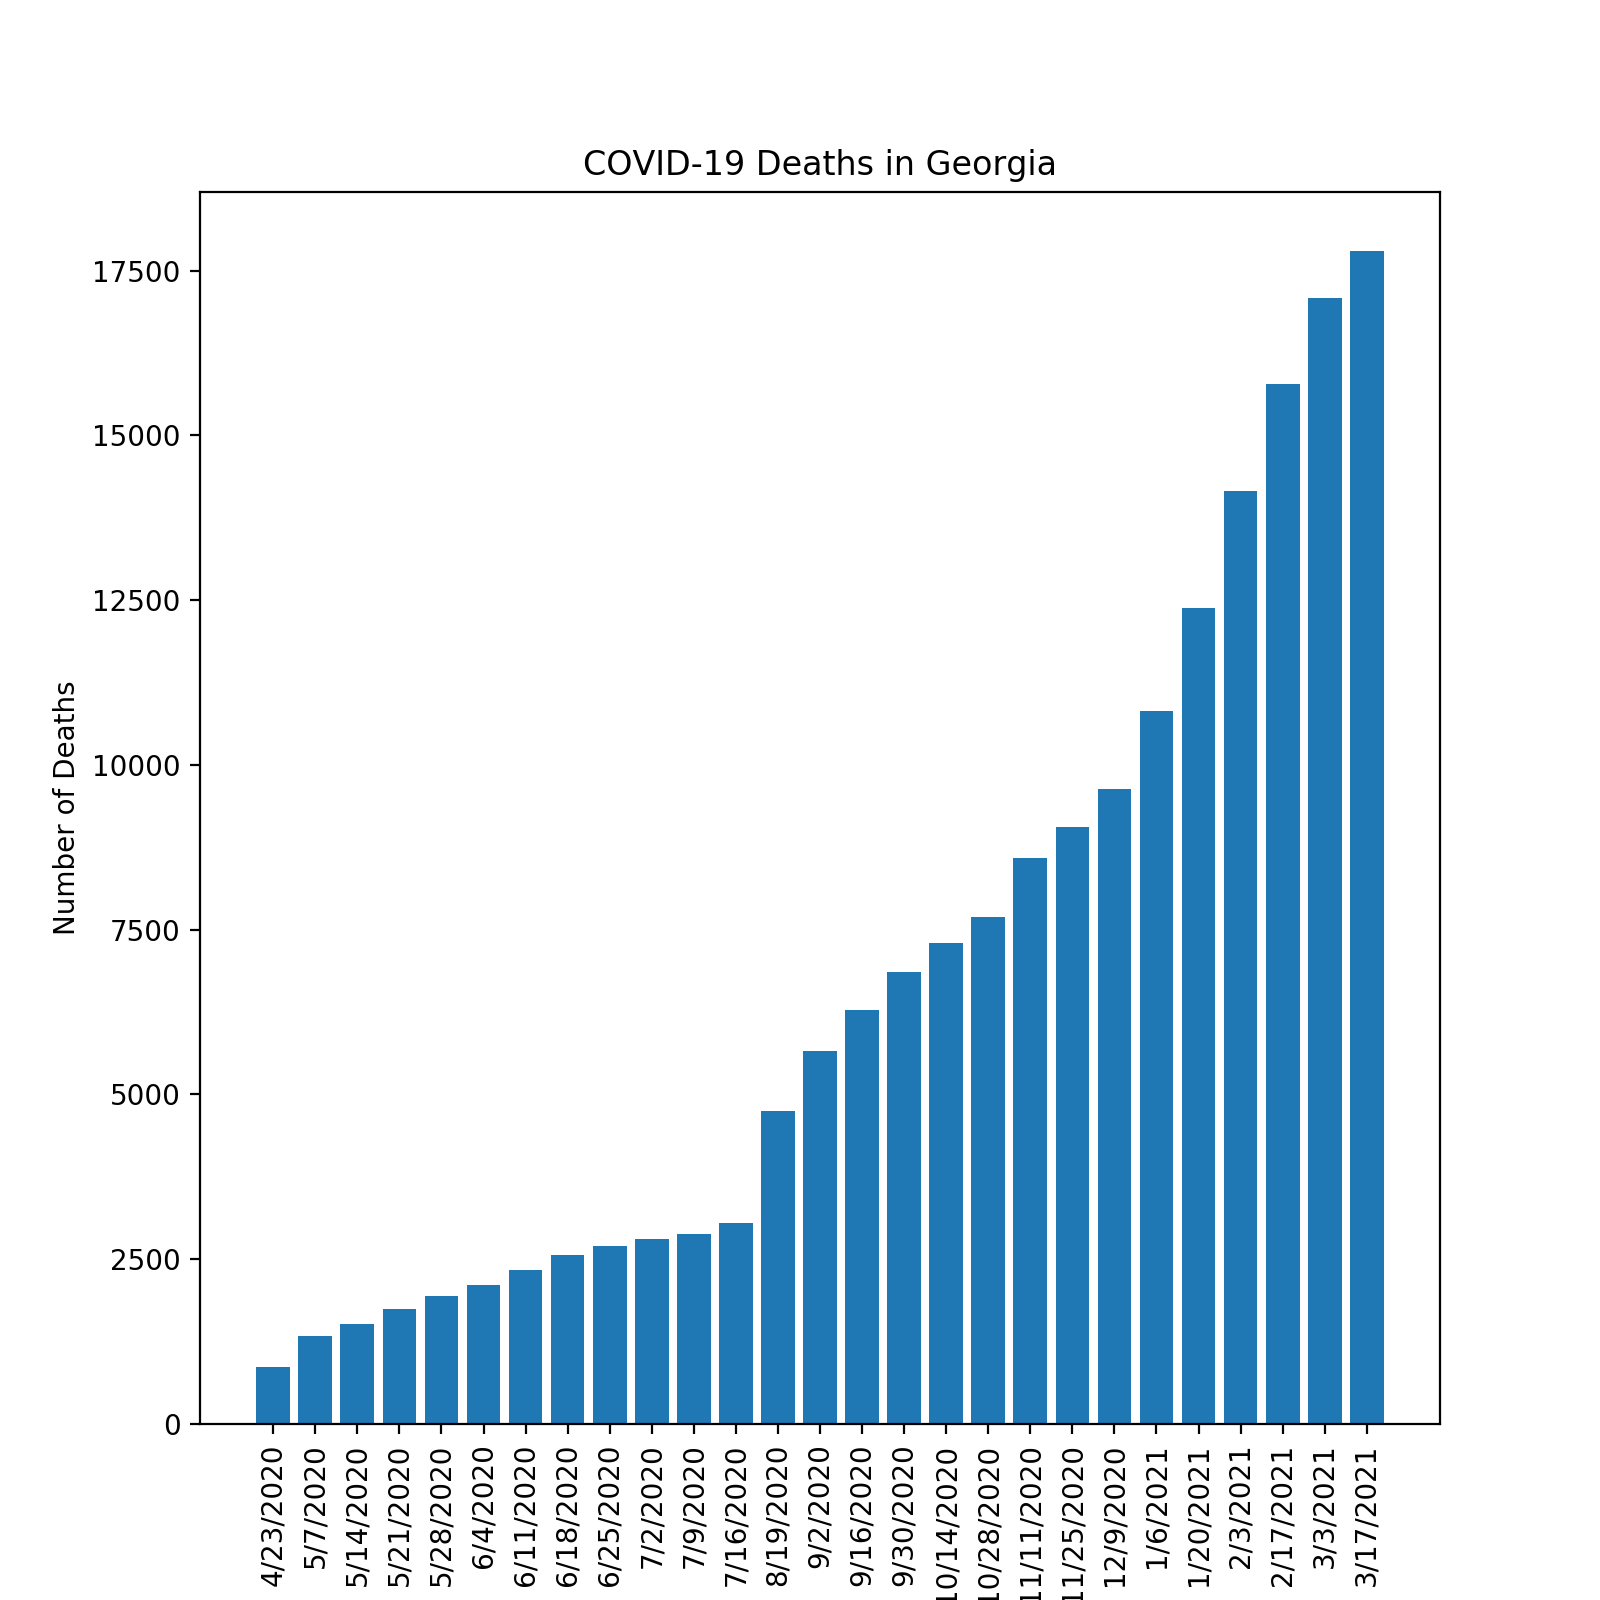

In [14]:
#set the figure size
plt.figure(figsize=(8,8))
#plot the bar figure of COVID-19 deaths in Georgia
plt.bar(a,c)
plt.xticks(rotation=90)
#set the title
plt.title("COVID-19 Deaths in Georgia")
#set the y label
plt.ylabel("Number of Deaths")
#save the png image
plt.savefig("Images/COVID-19 Deaths in Georgia")

<IPython.core.display.Javascript object>


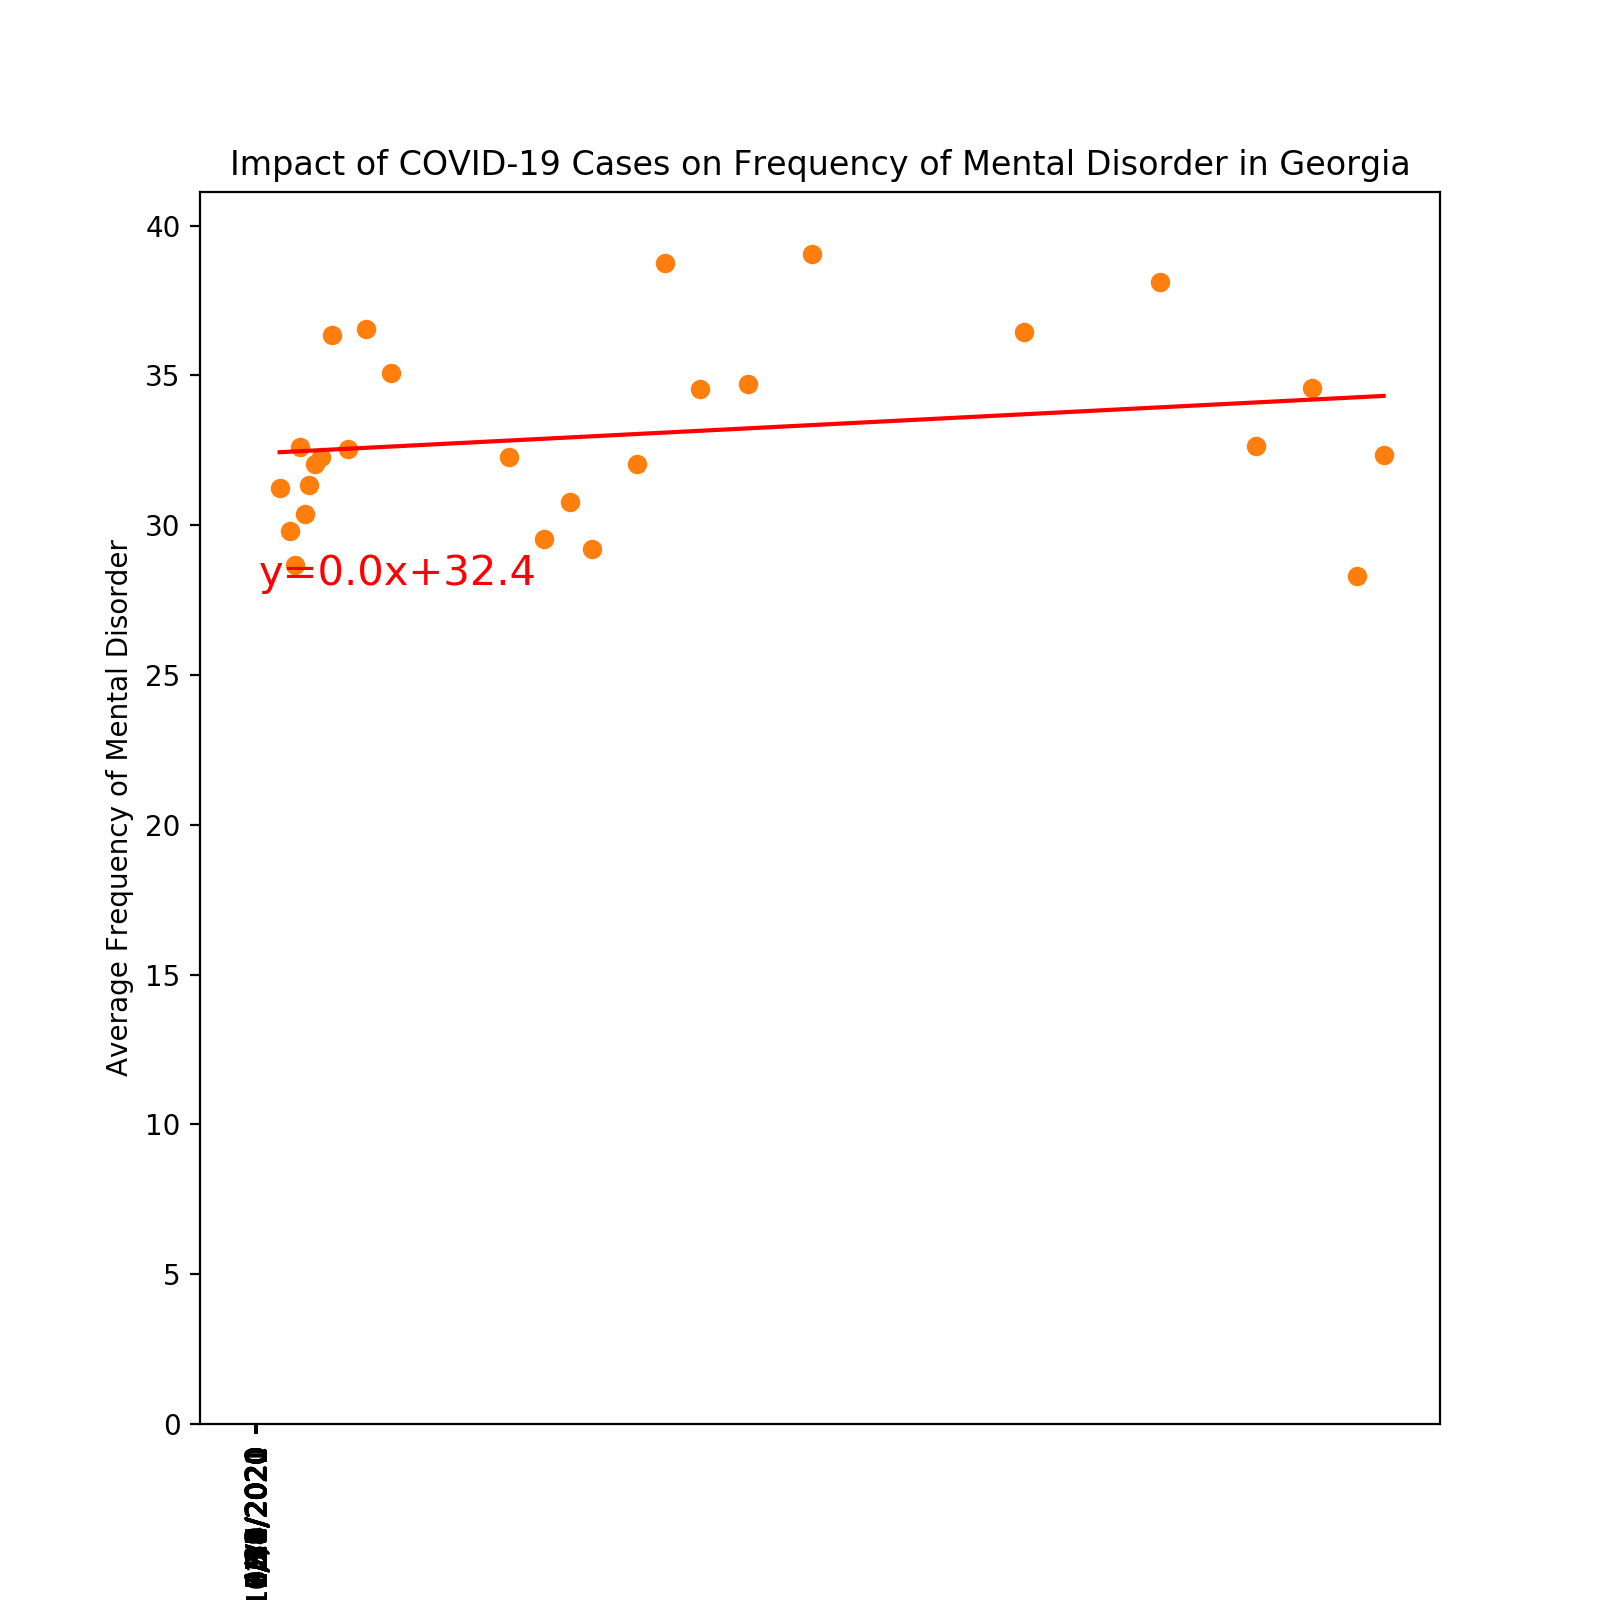

In [15]:
#set the figure size
plt.figure(figsize=(8,8))
#plot the bar figure of frequency of mental disorder in Georgia
plt.bar(a,d)
plt.xticks(rotation=90)
#set the title
plt.title("Frequency of Mental Disorder in Georgia")
#set the y label
plt.ylabel("Frequency of Mental Disorder")
#save the png image
plt.savefig("Images/Frequency of Mental Disorder in Georgia")

In [16]:
#scatter plot COVID-19 cases and frequency of mental disorder
plt.scatter(b,d)
#line regression model
(slope,intercept,rvalue,pvalue,stderr)=linregress(b,d)
regress_values=b*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(b,regress_values,"r-")
plt.annotate(line_eq,(1800,28),fontsize=15,color="red")
#set the title
plt.title("Impact of COVID-19 Cases on Frequency of Mental Disorder in Georgia")
#set the x label
plt.xlabel("Cases of COVID-19")
#set the y label
plt.ylabel("Average Frequency of Mental Disorder")
#print the r value
print(f"The r value is {round(rvalue**2,2)}.")
#save the png image
plt.savefig("Images/Impact of COVID-19 Cases on Frequency of Mental Disorder in Georgia")

The r value is 0.04.


<IPython.core.display.Javascript object>


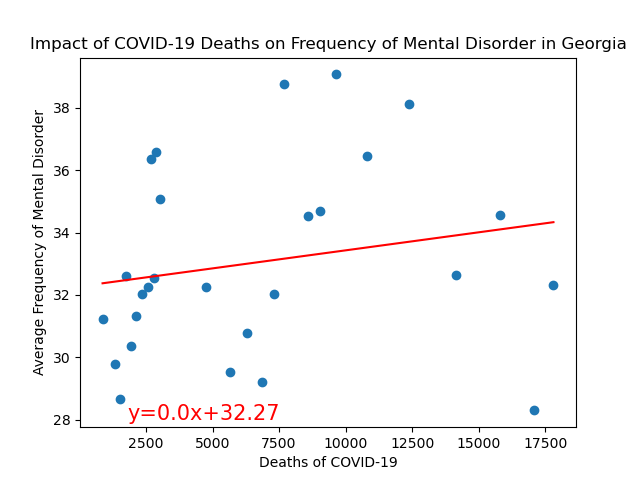

The r value is 0.04.


In [10]:
#scatter plot COVID-19 deaths and frequency of mental disorder
plt.scatter(c,d)
#line regression model
(slope,intercept,rvalue,pvalue,stderr)=linregress(c,d)
regress_values=c*slope+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.plot(c,regress_values,"r-")
plt.annotate(line_eq,(1800,28),fontsize=15,color="red")
#set the title
plt.title("Impact of COVID-19 Deaths on Frequency of Mental Disorder in Georgia")
#set the x label
plt.xlabel("Deaths of COVID-19")
#set the y label
plt.ylabel("Average Frequency of Mental Disorder")
#print the r value
print(f"The r value is {round(rvalue**2,2)}.")
#save the png image
plt.savefig("Images/Impact of COVID-19 Deaths on Frequency of Mental Disorder in Georgia")